In [24]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD.xlsx', 
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testD.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD.xlsx', 
                     'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testD.xlsx']


In [18]:
df_distractor=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_distractor_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['decoding_item'] = df_distractor['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor['training_item'] = df_distractor['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['decoding_item'] = df_distractor_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor_shuff['training_item'] = df_distractor_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])

In [19]:
df = df_distractor
df_shuff = df_distractor_shuff

df_time_distractor=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='distractor'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    df_time_distractor.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item] )   
                    ####)
#
df_time_distractor = pd.DataFrame(df_time_distractor)
df_time_distractor.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


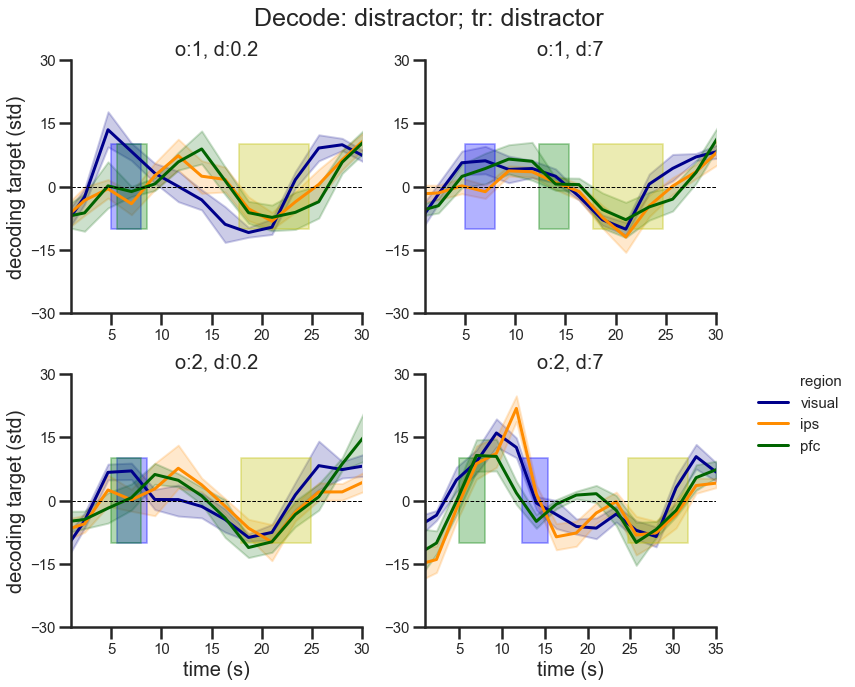

In [28]:
df_x = df_time_distractor.loc[df_time_distractor['training_item']=='distractor']
tiemcourse(df_x , 'Decode: distractor; tr: distractor', ylims=[-30,30])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


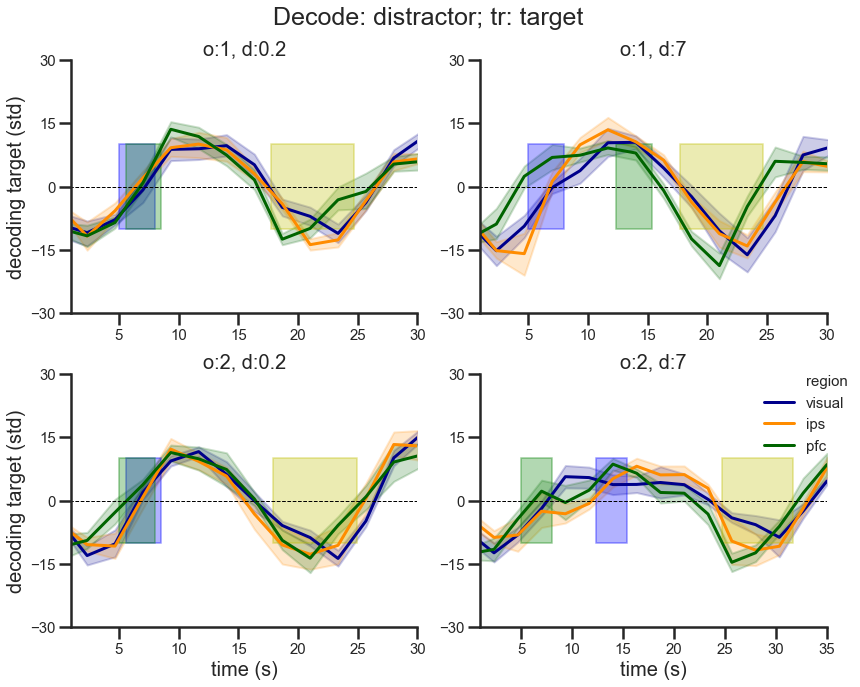

In [29]:
df_x = df_time_distractor.loc[df_time_distractor['training_item']=='target']
tiemcourse(df_x , 'Decode: distractor; tr: target', ylims=[-30,30])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


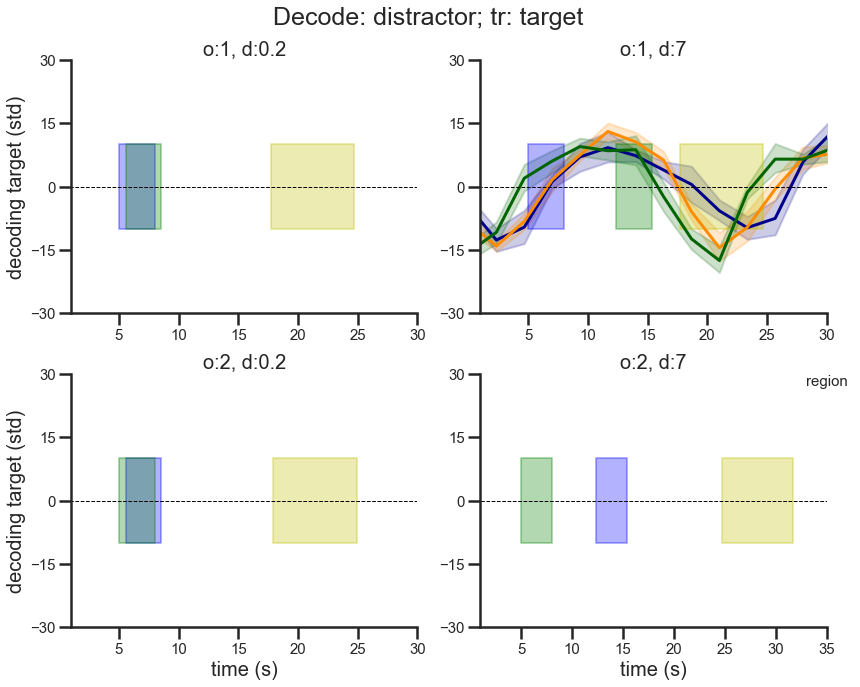

In [31]:
##### Comprobar si el "shuffle" en el Kfold del IEM funciona
##### Todavia me encuentro decoding cuando no toca :(

paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD_1_7.xlsx']
paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD_1_7.xlsx']

df_distractor=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_distractor_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['decoding_item'] = df_distractor['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor['training_item'] = df_distractor['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['decoding_item'] = df_distractor_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor_shuff['training_item'] = df_distractor_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])


##################################################

df = df_distractor
df_shuff = df_distractor_shuff

df_time_distractor=[]


for cond in ['1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target']:
                for t in df.times.unique(): 
                    #
                    decoding_item='distractor'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    df_time_distractor.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item] )   
                    ####)
####
df_time_distractor = pd.DataFrame(df_time_distractor)
df_time_distractor.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item']
####
df_x = df_time_distractor.loc[df_time_distractor['training_item']=='target']
tiemcourse(df_x , 'Decode: distractor; tr: target', ylims=[-30,30])

In [32]:
for t in df.times.unique(): 
    a = df.loc[(df['region']=='pfc') & (df['times']== t) & 
                           ( df['condition']=='1_7') & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)].decoding.mean()
    print(t, a)

0.0 -6.409556702357191
2.335 -7.636488875195172
4.67 1.404568511769769
7.005 3.764914608692914
9.34 5.959661076045816
11.675 6.88823800980204
14.01 7.10364563374889
16.345 -3.156386790761161
18.68 -5.619277708757695
21.015 -9.252123875924184
23.35 -2.395097614295589
25.685 3.940319138070501
28.02 4.316645678293519
30.355 6.751258591917596
32.69 8.69596128041201
35.025 3.230405825218548


In [34]:
for t in df.times.unique(): 
    a = df_shuff.loc[(df_shuff['region']=='pfc') & (df_shuff['times']== t) & 
                               ( df_shuff['condition']=='1_7') & (df_shuff['subject']==subj) &  
                               ( df_shuff['training_item']==training_item)  & 
                               ( df_shuff['decoding_item']== decoding_item) ].decoding.mean()
    print(t, a)

0.0 -1.6120893874044557
2.335 -1.3224553190414838
4.67 -0.6013554673632683
7.005 0.2893020603926374
9.34 1.0337021268801772
11.675 0.938954029315749
14.01 1.0711013803111316
16.345 -0.09509555624459576
18.68 -1.2292235887068348
21.015 -0.8208974079721288
23.35 -0.5729450991850178
25.685 0.4029290167043552
28.02 0.8595527521733922
30.355 0.5021698820758427
32.69 1.1221038449536995
35.025 1.153900768641872


In [35]:
for t in df.times.unique(): 
    a = df_shuff.loc[(df_shuff['region']=='pfc') & (df_shuff['times']== t) & 
                               ( df_shuff['condition']=='1_7') & (df_shuff['subject']==subj) &  
                               ( df_shuff['training_item']==training_item)  & 
                               ( df_shuff['decoding_item']== decoding_item) ].decoding.std()
    print(t, a)

0.0 0.6453995582274299
2.335 0.621233555716379
4.67 0.6309434465154582
7.005 0.7855218824003342
9.34 0.47084157800235965
11.675 0.38057282879763527
14.01 0.5015065898207852
16.345 0.2992375422317903
18.68 0.4885787866801602
21.015 0.5221644688762211
23.35 0.44016829503734484
25.685 0.35628132112777733
28.02 0.788508112148515
30.355 0.4592060807122042
32.69 0.5822062287218688
35.025 0.5461714296420065


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


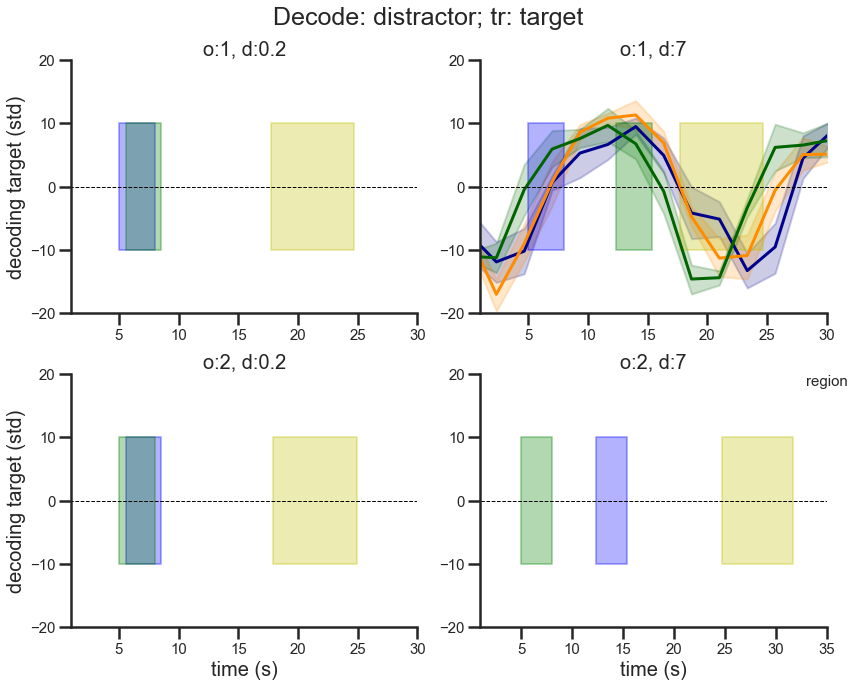

In [37]:
##### Comprobar si el número de Kfolds es el tema: cambiar por leave one out en vez de 10
##### 

paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD_1_7_l1out.xlsx']
paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD_1_7_l1out.xlsx']

df_distractor=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_distractor_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['decoding_item'] = df_distractor['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor['training_item'] = df_distractor['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['decoding_item'] = df_distractor_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor_shuff['training_item'] = df_distractor_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])


##################################################

df = df_distractor
df_shuff = df_distractor_shuff

df_time_distractor=[]


for cond in ['1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target']:
                for t in df.times.unique(): 
                    #
                    decoding_item='distractor'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) /  dec_shuff.std()
                    df_time_distractor.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item] )   
                    ####)
####
df_time_distractor = pd.DataFrame(df_time_distractor)
df_time_distractor.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item']
####
df_x = df_time_distractor.loc[df_time_distractor['training_item']=='target']
tiemcourse(df_x , 'Decode: distractor; tr: target')